<a href="https://colab.research.google.com/github/Shivraj720/Cat-Dog-Classification/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [ ]:
import tensorflow as tf 
import kaggle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
path=r'/content/dogs_vs_cats/train'
img_size=224

In [ ]:
training=tf.keras.utils.image_dataset_from_directory(
    path,
    image_size=(img_size,img_size),
    seed=123,
    validation_split=0.2,
    subset='training',
    labels='inferred',
    label_mode='int'
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.


In [ ]:
val_df=tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_size,img_size),
    labels='inferred',
    label_mode='int'
)

Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [ ]:
tpath=r'/content/dogs_vs_cats/test'

In [ ]:
test_df=tf.keras.utils.image_dataset_from_directory(
    tpath,
    labels='inferred',
    label_mode='int',
    seed=123,
    image_size=(img_size,img_size)
)

Found 5000 files belonging to 2 classes.


In [ ]:
class_names=training.class_names

In [ ]:
print(class_names)

['cats', 'dogs']


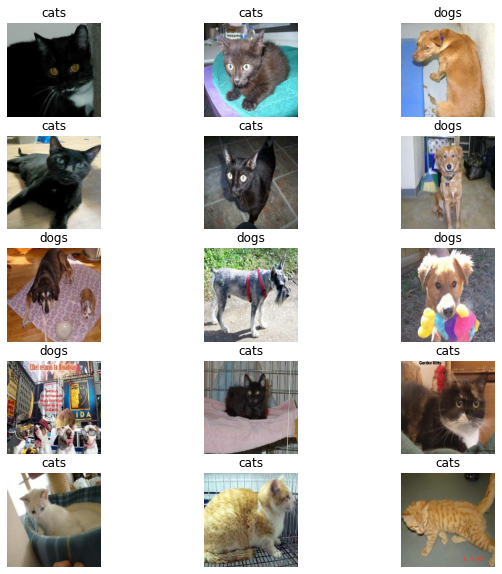

In [ ]:
plt.figure(figsize=(10,10))
for img,label in training.take(1):
  for i in range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [ ]:
# Scaling
def pre(img,label):
  img=tf.cast(img/255, tf.float32)
  return img,label

In [ ]:
train_df=training.map(pre)

In [ ]:
val_df=val_df.map(pre)

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32,activation='relu',padding='valid',kernel_size=(3,3),input_shape=(224,224,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(tf.keras.layers.Conv2D(64,activation='relu',padding='valid',kernel_size=(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(tf.keras.layers.Conv2D(128,activation='relu',padding='valid',kernel_size=(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(tf.keras.layers.Conv2D(256,activation='relu',padding='valid',kernel_size=(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
hist=model.fit(train_df,validation_data=val_df,epochs=10)

Epoch 1/10
500/500 [==============================] - 62s 108ms/step - loss: 0.8774 - accuracy: 0.6046 - val_loss: 0.6228 - val_accuracy: 0.6515
Epoch 2/10
500/500 [==============================] - 51s 102ms/step - loss: 0.5404 - accuracy: 0.7266 - val_loss: 0.5149 - val_accuracy: 0.7500
Epoch 3/10
500/500 [==============================] - 54s 107ms/step - loss: 0.4633 - accuracy: 0.7836 - val_loss: 0.6516 - val_accuracy: 0.7203
Epoch 4/10
500/500 [==============================] - 50s 100ms/step - loss: 0.3945 - accuracy: 0.8231 - val_loss: 0.5365 - val_accuracy: 0.7585
Epoch 5/10
500/500 [==============================] - 49s 98ms/step - loss: 0.3140 - accuracy: 0.8652 - val_loss: 0.3936 - val_accuracy: 0.8355
Epoch 6/10
500/500 [==============================] - 53s 106ms/step - loss: 0.2269 - accuracy: 0.9082 - val_loss: 0.5753 - val_accuracy: 0.7825
Epoch 7/10
500/500 [==============================] - 53s 105ms/step - loss: 0.1546 - accuracy: 0.9393 - val_loss: 0.5186 - val_acc

In [ ]:
model.evaluate(test_df) # Without Scaling

157/157 [==============================] - 10s 61ms/step - loss: 91.5906 - accuracy: 0.6664


[91.5905532836914, 0.6664000153541565]

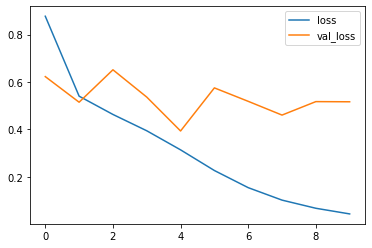

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

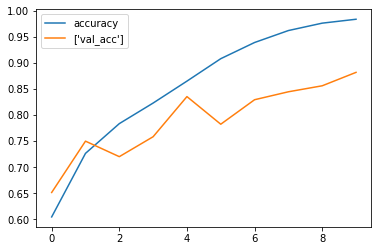

In [ ]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label=['val_acc'])
plt.legend()

In [ ]:
test_df1=test_df.map(pre)

In [ ]:
test_loss,test_acc=model.evaluate(test_df1) # With Scaling

157/157 [==============================] - 10s 64ms/step - loss: 0.4993 - accuracy: 0.8750


In [ ]:
from collections import Counter

In [ ]:
# Testing model on random images

In [ ]:
ipath=r'/content/dog.187.jpg'

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread(ipath)

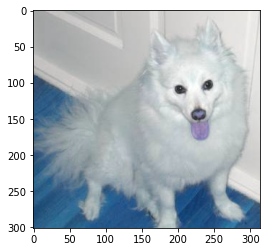

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(img_size,img_size))

In [ ]:
test_img=test_img.reshape((1,224,224,3))

In [ ]:
test_img=test_img/255

In [ ]:
y_p=model.predict(test_img)

1/1 [==============================] - 0s 173ms/step


In [ ]:
if y_p[0][0] >= 0.5:
        prediction = 'dog'
        probability = y_p[0][0]
        print ("probability = " + str(probability))
else:
        prediction = 'cat'
        probability = 1 - y_p[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)

probability = 1.0


In [ ]:
y_p[0][0]

1.0